In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


Key columns

total_bill – cost of the meal

tip – tip amount

sex – gender of payer/waiter? (ambiguous; often interpreted as customer gender)

smoker – smoker in the party

day – day of week

time – Lunch/Dinner

size – number of diners

In [6]:
# Check missing values
print(tips.isna().mean())

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


In [7]:
# Quick value counts
for col in ["sex", "smoker", "day", "time"]:
    print(f"\n{col.upper()}:\n", tips[col].value_counts())


SEX:
 sex
Male      157
Female     87
Name: count, dtype: int64

SMOKER:
 smoker
No     151
Yes     93
Name: count, dtype: int64

DAY:
 day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

TIME:
 time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [8]:
# engineered feature:
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips["tip_pct"].describe()

count    244.000000
mean       0.160803
std        0.061072
min        0.035638
25%        0.129127
50%        0.154770
75%        0.191475
max        0.710345
Name: tip_pct, dtype: float64

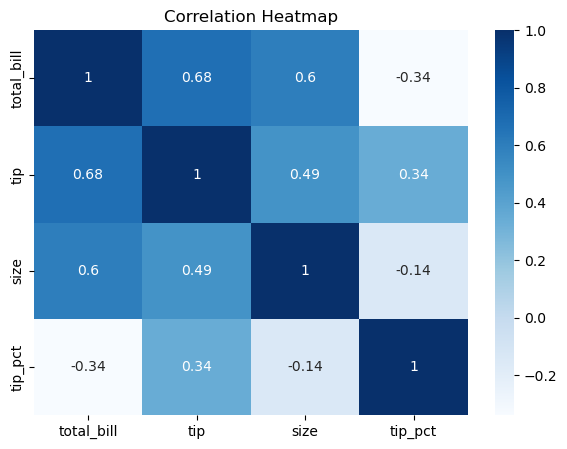

In [9]:
# Correlation Heatmap

plt.figure(figsize=(7,5))
sns.heatmap(tips.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

/var/folders/zq/7ptd503177z6khbsfqhbyw780000gn/T/ipykernel_63380/1257127211.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = tips.pivot_table(


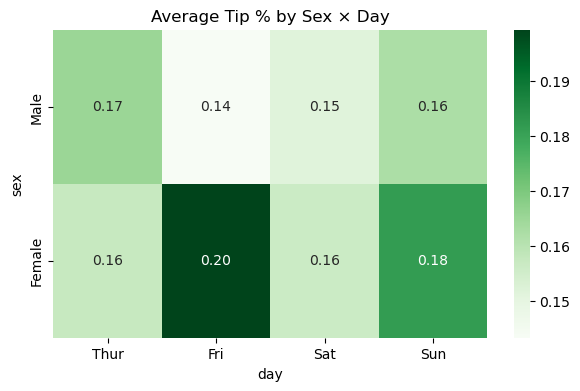

In [10]:
# Heatmap: Tip % by Sex × Day

pivot = tips.pivot_table(
    index="sex",
    columns="day",
    values="tip_pct",
    aggfunc="mean"
)

plt.figure(figsize=(7,4))
sns.heatmap(pivot, annot=True, cmap="Greens", fmt=".2f")
plt.title("Average Tip % by Sex × Day")
plt.show()

<Figure size 1000x700 with 0 Axes>

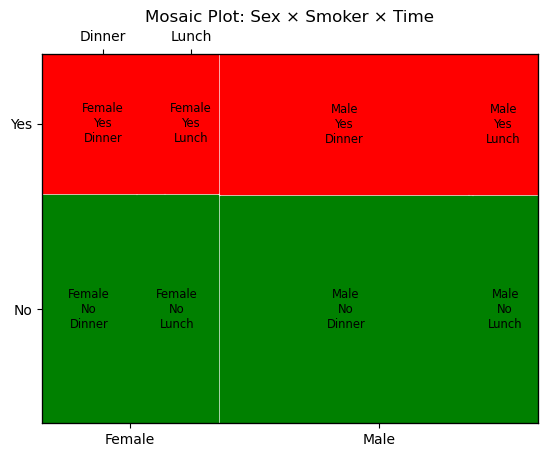

In [11]:
# Mosaic Plot: Sex × Smoker × Time

from statsmodels.graphics.mosaicplot import mosaic

df = tips[["sex", "smoker", "time"]]

# Custom colors
def colorizer(key):
    sex, smoker, time = key
    if smoker == "Yes":
        return "red"
    else:
        return "green"

plt.figure(figsize=(10,7))
mosaic(df, ["sex", "smoker", "time"], 
       properties=lambda key: {"color": colorizer(key)})
plt.title("Mosaic Plot: Sex × Smoker × Time")
plt.show()

In [12]:
pd.crosstab([tips["sex"], tips["smoker"]], tips["time"], normalize="index")

time              Lunch    Dinner
sex    smoker                    
Male   Yes     0.216667  0.783333
       No      0.206186  0.793814
Female Yes     0.303030  0.696970
       No      0.462963  0.537037

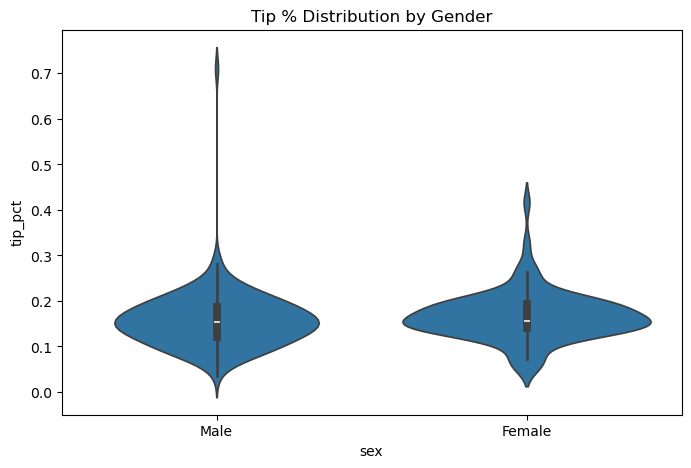

In [13]:
# Violin Plot: Tip % Distribution by gender

plt.figure(figsize=(8,5))
sns.violinplot(data=tips, x="sex", y="tip_pct")
plt.title("Tip % Distribution by Gender")
plt.show()

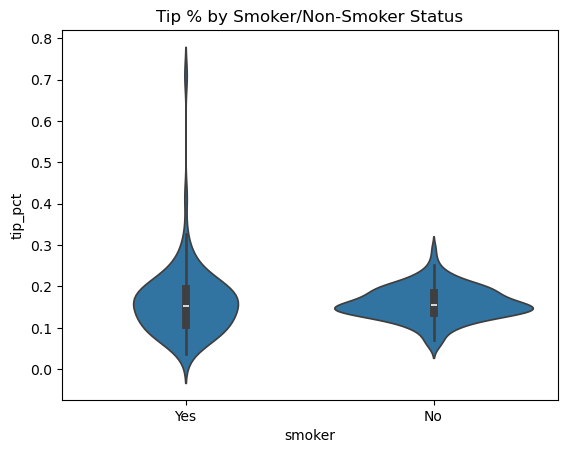

In [14]:
# By smoker

sns.violinplot(data=tips, x="smoker", y="tip_pct")
plt.title("Tip % by Smoker/Non-Smoker Status")
plt.show()

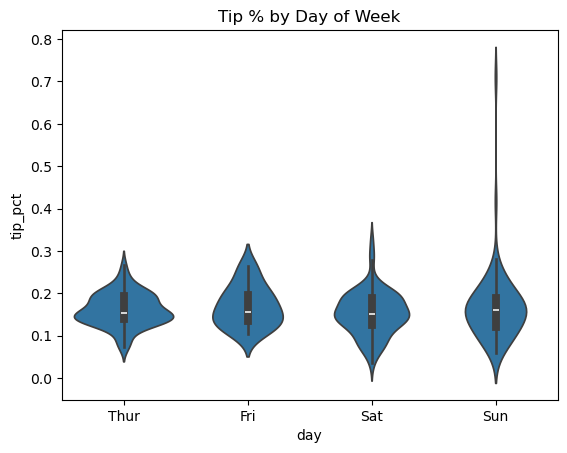

In [15]:
# By day

sns.violinplot(data=tips, x="day", y="tip_pct")
plt.title("Tip % by Day of Week")
plt.show()

In [16]:
# MACHINE LEARNING MODEL

In [17]:
# Regression Model (Predict Tip %)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

tips_ml = tips.copy()
tips_ml["tip_pct"] = tips_ml["tip"] / tips_ml["total_bill"]

X = tips_ml.drop(["tip", "total_bill", "tip_pct"], axis=1)
y = tips_ml["tip_pct"]

categorical = ["sex", "smoker", "day", "time"]
numeric = ["size"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def eval_reg(y_true, y_pred, name="model"):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} | MSE: {mse:.4f} | R^2: {r2:.4f}")

In [19]:
from catboost import CatBoostRegressor

# CatBoost wants categorical column indices (or names, but indices are common)
cat_features_idx = [X.columns.get_loc(c) for c in categorical]

cb = CatBoostRegressor(
    loss_function="RMSE",
    depth=6,
    learning_rate=0.05,
    iterations=2000,
    random_seed=42,
    verbose=False
)

cb.fit(X_train, y_train, cat_features=cat_features_idx)

pred = cb.predict(X_test)
eval_reg(y_test, pred, "CatBoost")

CatBoost | MSE: 0.0062 | R^2: -1.5646


In [20]:
from xgboost import XGBRegressor

preprocess_ohe = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
    ("num", "passthrough", numeric)
])

xgb = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

xgb_pipe = Pipeline([
    ("prep", preprocess_ohe),
    ("reg", xgb)
])

xgb_pipe.fit(X_train, y_train)
pred = xgb_pipe.predict(X_test)
eval_reg(y_test, pred, "XGBoost (OHE)")

XGBoost (OHE) | MSE: 0.0036 | R^2: -0.4789


In [21]:
from lightgbm import LGBMRegressor

preprocess_ohe = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
    ("num", "passthrough", numeric)
])

lgbm = LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.02,
    num_leaves=31,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgbm_pipe = Pipeline([
    ("prep", preprocess_ohe),
    ("reg", lgbm)
])

lgbm_pipe.fit(X_train, y_train)
pred = lgbm_pipe.predict(X_test)
eval_reg(y_test, pred, "LightGBM (OHE)")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM (OHE) | MSE: 0.0032 | R^2: -0.3217


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [22]:
# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

tips_ml = tips.copy()
tips_ml["tip_pct"] = tips_ml["tip"] / tips_ml["total_bill"]

X = tips_ml.drop(["tip", "total_bill", "tip_pct"], axis=1)
y = tips_ml["tip_pct"]

categorical = ["sex", "smoker", "day", "time"]
numeric = ["size"]

preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first"), categorical),
    ("num", "passthrough", numeric)])

model = Pipeline([
    ("prep", preprocess),
    ("reg", LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

print("R^2:", model.score(X_test, y_test))

R^2: 0.033835586075594115


In [24]:
# Classification: High Tip vs Low Tip

In [25]:
tips_ml["high_tip"] = (tips_ml["tip_pct"] > 0.18).astype(int)

from sklearn.ensemble import RandomForestClassifier

X = tips_ml.drop(["tip", "total_bill", "tip_pct", "high_tip"], axis=1)
y = tips_ml["high_tip"]

categorical = ["sex", "smoker", "day", "time"]
numeric = ["size"]

preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first"), categorical),
    ("num", "passthrough", numeric)
])

clf = Pipeline([
    ("prep", preprocess),
    ("rf", RandomForestClassifier(n_estimators=300, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)

print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.5918367346938775


In [26]:
y_pred_mean = np.full_like(y_test, y_train.mean())
from sklearn.metrics import r2_score, mean_squared_error

print("Baseline R^2:", r2_score(y_test, y_pred_mean))
print("Baseline MSE:", mean_squared_error(y_test, y_pred_mean))

Baseline R^2: -0.6333333333333335
Baseline MSE: 0.3877551020408163


# Tip percentage is weakly predictable from observable diner and context features. 
# Social norms dominate individual variation.

## All machine learning models (Linear Regression, CatBoost, XGBoost, LightGBM) yielded negative out-of-sample R² values when predicting tip percentage. 

## This indicates that observable features such as gender, smoking status, dining time, and party size provide less predictive power than a naïve mean-based baseline. 

## The result suggests that tipping behavior is primarily governed by social norms rather than measurable contextual variables.